# Part 1. The ”Rock Paper Scissors” game

We consider the sequential version of a repeated two-player zero-sum game
between a player and an adversary, whose setting is detailed below. Let L ∈
{−1,1}M×N be a loss matrix known by the players. At each round t= 1,...,T:
1. The player chooses a distribution pt ∈∆M 
2. The adversary chooses a distribution qt ∈∆N.
3. The actions of both players are sampled It ∼pt and Jt ∼qt.
4. The player incurs the loss L(Jt ,It) and the adversary the loss−L(It ,Jt).


## Imports

In [200]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Rock Paper Scissors matrix

Recall M,N and a loss matrix L∈{−1,1}M×N that corresponds to the game
”Rock Paper Scissors”

## 2. Implementation of EWA

(a) Implement the function rand weighted that takes as input a probability
vector p∈∆M and return I = 1,...,M satisfying P(I= i) = pi.

In [202]:
def rand_weight (p):
    """
    p :vecteur d3 de proba
    i :l'index i choisi selon la loi p
    """
    uni = np.random.uniform(0, 1)
    somme = 0.0              # Mon idée : on place p1, p2, p3 sur [0,1] et on tire un uniforme. 
    for i in range(3):
        somme += p[i]
        if uni < somme :    # Si le tirage est dans l'intervalle de pi, on renvoie i
            return i 

In [203]:
# Test empirique de rand_weight
p0 = np.array([1/3, 1/6, 1/2])
counts = np.zeros(3)
n_trials = 100000
for _ in range(n_trials):
    i = rand_weight(p0)
    counts[i] += 1
print("Empirical probabilities:", counts / n_trials)


Empirical probabilities: [0.33504 0.16761 0.49735]


(b) Define a function EWA update that takes as input a vector pt ∈∆M and
a loss vector ℓt ∈{−1,1}M and returns the updated vector pt+1 ∈∆M

## 3. Simulation against a fixed adversary

Consider the game ”Rock Paper Scissors” and assume that the adversary chooses
qt = (1/6,1/3,1/2) and samples Jt ∼qt for all rounds t≥1.

(a) What is the loss ℓt(i) incurred by the player if she chooses action i at time t? 

**On ne peut pas donner une valaeur exacte pour Lt(i), car c'est une variable aléatoire, mais E[Lt] = [1/6 , -2/6 , 1/6]**

Simulate an instance of the game for t= 1,...,T = 100 for η= 1.

In [207]:
T = 100
proba_joueur = np.array([1/3, 1/3, 1/3])
proba_adversaire = np.array([1/6, 1/3, 1/2])
evolution_probas, losses = simulation_EWA(T, proba_joueur, proba_adversaire, loss_matrix, eta=1)

(b) Plot the evolution of the weight vectors p1,p2,...,pT. What seems to be the best strategy here?

**-->Comme dans le calcul de l'espérance de Lt, on observe bien que :**

**-jouer Papier est perdant**

**-l'algo switch entre Pierre et Ciseaux qui sont équi-gagnant, avec des changements brutaux dus à la 'grande' taille d'éta**

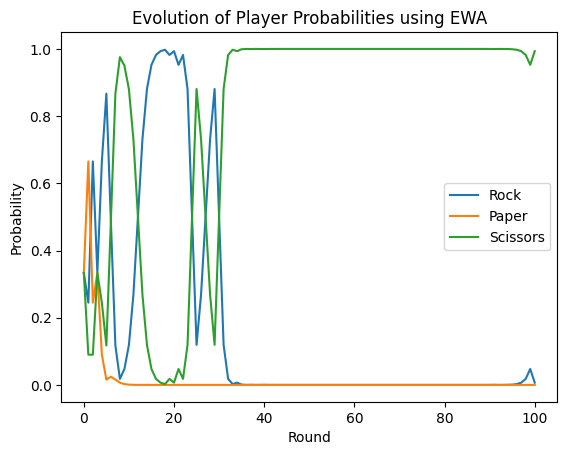

(c) Repeat the simulation n = 200 times and plot the average loss ℓt =
1
t
t
s=1 ℓ(is,js) as a function of t (averaged over the experiments).

<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
/var/folders/2b/txz191yj65l8dvw4jln17n680000gn/T/ipykernel_69086/3756341627.py:22: SyntaxWarning: invalid escape sequence '\e'
  plt.title("Average cumulative loss over n = 200 simulations (EWA, $\eta=1$)")


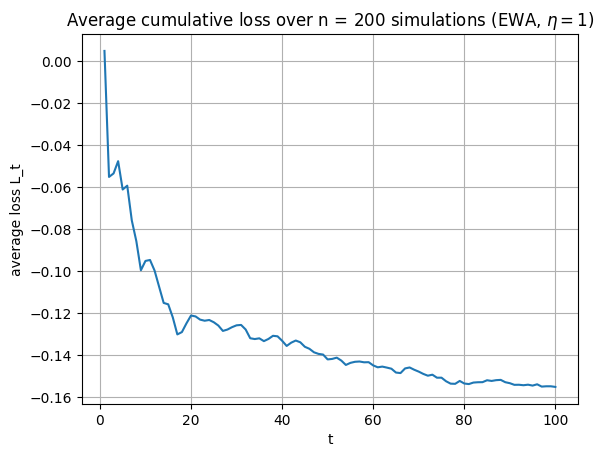

(d) Repeat one simulation for diﬀerent values of learning rates η∈{0.01,0.03,0.1,0.3,1} and plot the average loss as a function of η. What are the best ηin practice and in theory?

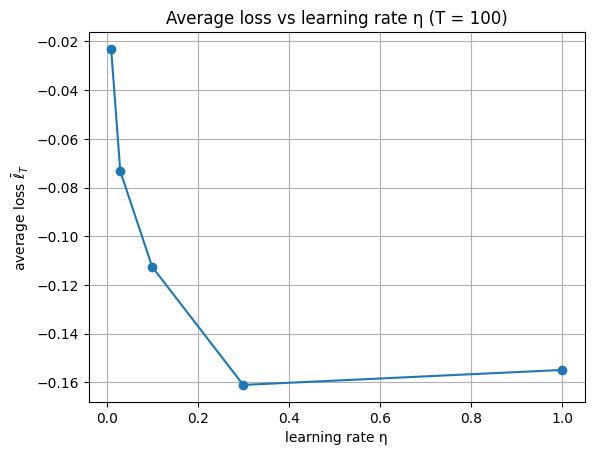

Ici le meilleur éta change selon les itérations du code. Entre 0.3 et 0.1 et ce même en lissant en faisant 200 simulation.

En théorie, le regret (eta) < log (M)/eta + C* eta * T,

## 4. Implementation of OGD

(a) Define the Euclidean projection over the simplex proj simplex that takes x ∈RN and returns its projection Proj∆N (x) ∈∆N.

## 5. EWA vs OGD
Run an experiment of the game ”Rock Paper Scissors” in which EWA is the
player and OGD the adversary. Define ¯ pt =
1
t
t
s=1 ps. Plot in log log scale
∥¯
pt−(1/3,1/3,1/3)∥2 as a function of t= 1,...,10000.

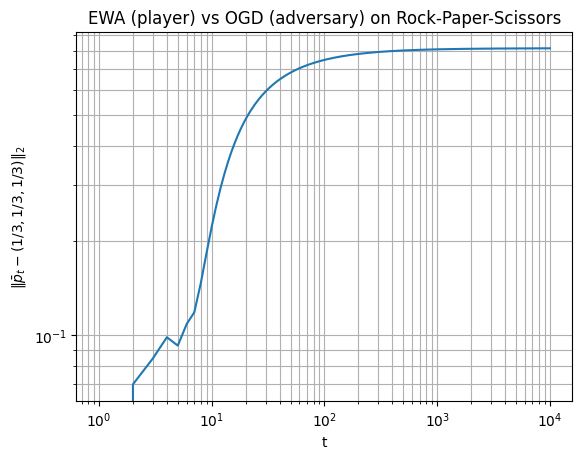

## 6. Hedge vs OGD

(a) Define a function Hedge update that takes as input a vector pt, the adversary’s strategy qt, and returns pt+1 ∈∆N.

(b) Run an experiment of the game ”Rock Paper Scissors” in which Hedge is
the player and OGD the adversary. Define ¯ pt =
1
t
t
s=1 ps. Plot in log log
scale ∥¯
pt−(1/3,1/3,1/3)∥2 as a function of t = 1,...,10000. Compare
with the results obtained in Question 5.

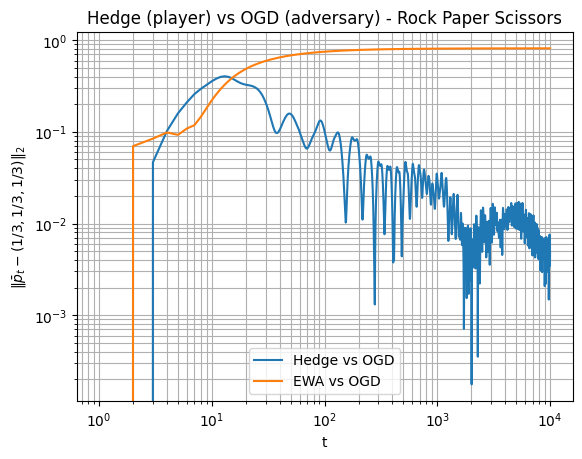

### EWA finit par toujours jouer la même action contre un adversaire OGD, d'ou norm_diffs tend vers une constante non nulle.
### Hedge, en revanche, semble bien converger vers la stratégie uniforme contre un adversaire OGD.

# Part II. MNIST

## 0. Import

J'ai utilisé ChatGPT pour générer le code qui lisait le dataset; je n'y arrivais pas du tout seul.

Fichiers utilisés :
 train images: train-images.idx3-ubyte
 train labels: train-labels.idx1-ubyte
 test images : t10k-images.idx3-ubyte
 test labels : t10k-labels.idx1-ubyte
Shapes:
 X_train: (60000, 784) uint8
 y_train: (60000,) uint8
 X_test : (10000, 784) uint8
 y_test : (10000,) uint8
Binaire: [-1  1]
X_train_f: (60000, 785)


## 1. Dimension and Region of Search

What is the value of d here when, as usual, one adds an intercept (a fictitious pixel = 1) after standardizing X so that the grayscale of the pixels fits to [0,1]?
Propose a possible region of search K

**--> Il y a 28x28 = 784 pixels par image, et on ajoute l'ntercept, i.e. d=785**

**--> Donc K est de la forme { Thêta appartient à R^785 / ||X|| < D}. Pour savoir la valeur de D je n'ai pas d'à priori au vu du problème. Peut etre partir sur D = 10 puis adapter cette valeur selon le nombre de fois ou on reprojette sur K.**

## 2. Loss Functions
We define the the logistic loss function ℓ(yt,θ⊤Xt) = log(1 + exp(−ytθ⊤Xt)).

Le gradient en têta est

**grad = -yx / (1 + exp(y*thêta_T x))**

La Hessienne est 

**hess = exp(y * thêta_T x) / (1 + exp(y * thêta_T x)) xx_T**

## 3. Algorithm

OGD final loss mean: 0.06967854049908476
AdaGrad final loss mean: 0.035155545742588425


## 4. Regret

||theta_star||: 1.9690942799620186


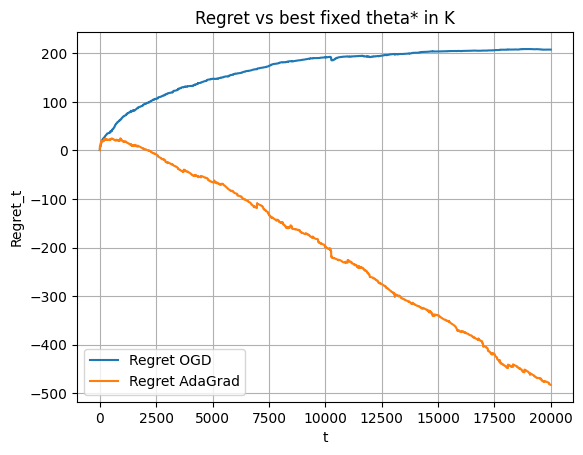